a) CARREGAMENTO DOS DADOS
✓ 47 registros carregados

b) ANÁLISE ESTATÍSTICA
           tamanho    quartos          preco
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.765957
std     794.702354   0.760982  125039.911223
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000

• Média de preço: $340,413
• Casa mais barata: $169,900
• Quartos da casa mais cara: 5

c) MATRIZ X E VETOR y
✓ Matriz X: (47, 2) (tamanho, quartos)
✓ Vetor y: (47,) (preços)

d) CORRELAÇÃO E REGRESSÃO SIMPLES
Tamanho × Preço: r = 0.8550 | y = 71271 + 134.53x
Quartos × Preço: r = 0.4423 | y = 110034 + 72670x


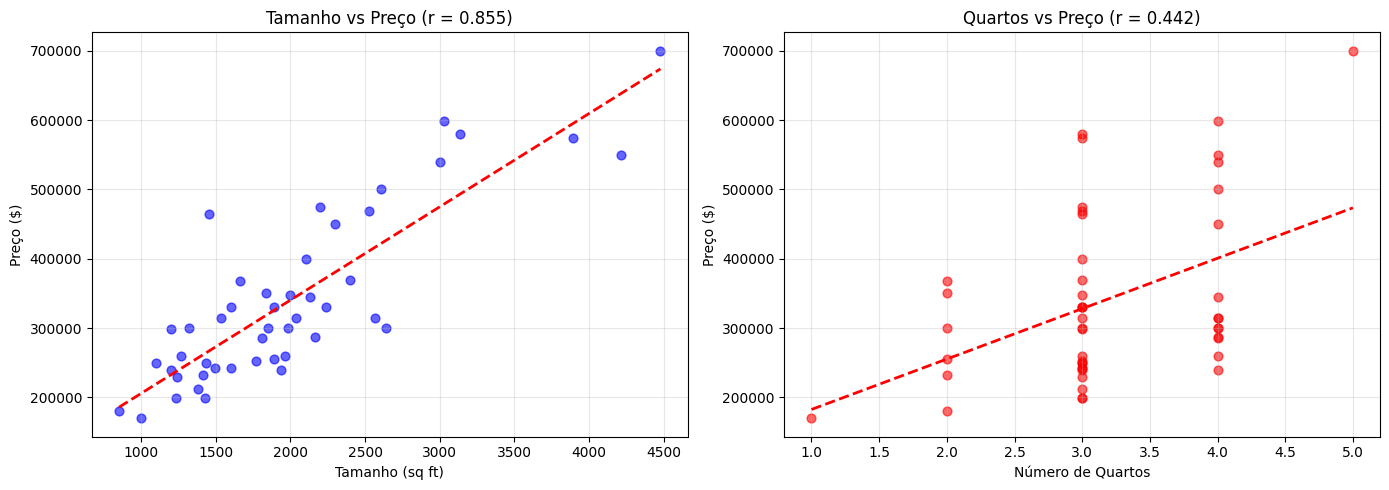


e) REGRESSÃO MÚLTIPLA
y = 89598 + 139.21x₁ + -8738x₂
(x₁=tamanho, x₂=quartos, y=preço)

f) GRÁFICO 3D COM SUPERFÍCIE DE REGRESSÃO


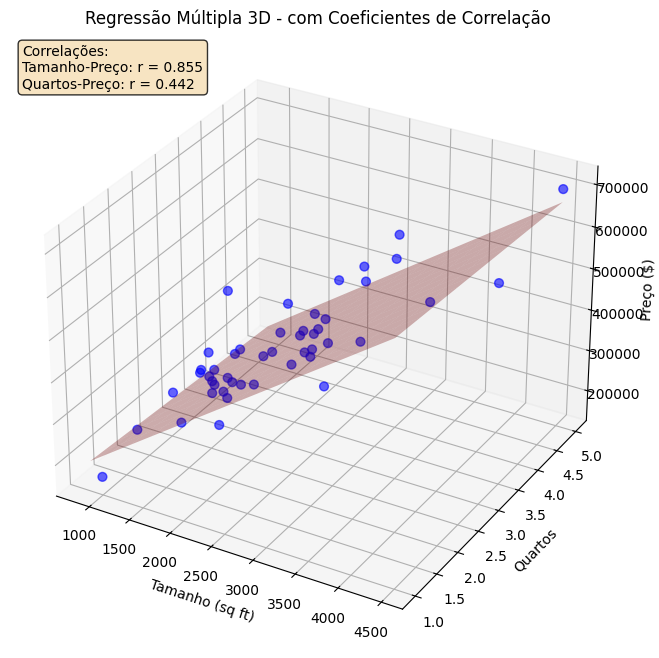


g) COEFICIENTES DE CORRELAÇÃO MOSTRADOS NO GRÁFICO 3D
✓ Tamanho vs Preço: r = 0.8550
✓ Quartos vs Preço: r = 0.4423
✓ Valores exibidos no gráfico 3D

h) PREDIÇÃO: CASA 1650 sq ft, 3 QUARTOS
Preço predito: $293082
Resultado esperado: $293,081
Diferença: $1

Variando quartos (tamanho fixo em 1650):
  1 quartos → $310557
  2 quartos → $301819
  3 quartos → $293082
  4 quartos → $284344
  5 quartos → $275606

→ Cada quarto adicional remove ~$8738

i) COMPARAÇÃO COM SCIKIT-LEARN
                        β₀         β₁         β₂
Nossa impl.:        89598     139.21      -8738
Scikit-learn:       89598     139.21      -8738

Predição (1650, 3 quartos):
  Nossa: $293082
  Sklearn: $293082
  Diferença: $0

R² Score: 0.7329 (73.3% da variância explicada)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# =============================================================================
# FUNÇÕES DE CORRELAÇÃO E REGRESSÃO
# =============================================================================

def correlacao(x, y):
    """Calcula coeficiente de correlação r = Σ(x-x̄)(y-ȳ) / √[Σ(x-x̄)² * Σ(y-ȳ)²]"""
    x_media = sum(x) / len(x)
    y_media = sum(y) / len(y)
    
    # Covariância e desvios padrão
    numerador = sum((xi - x_media) * (yi - y_media) for xi, yi in zip(x, y))
    soma_x_quad = sum((xi - x_media) ** 2 for xi in x)
    soma_y_quad = sum((yi - y_media) ** 2 for yi in y)
    denominador = (soma_x_quad * soma_y_quad) ** 0.5
    
    return numerador / denominador if denominador != 0 else float('nan')

def regressao(x, y):
    """Calcula coeficientes β₀ e β₁ da regressão linear"""
    x_media = sum(x) / len(x)
    y_media = sum(y) / len(y)
    
    # β₁ = Σ(x-x̄)(y-ȳ) / Σ(x-x̄)²
    numerador = sum((xi - x_media) * (yi - y_media) for xi, yi in zip(x, y))
    denominador = sum((xi - x_media) ** 2 for xi in x)
    
    if denominador == 0:
        return float('nan'), float('nan')
    
    beta1 = numerador / denominador
    beta0 = y_media - beta1 * x_media  # β₀ = ȳ - β₁*x̄
    
    return beta0, beta1

def regressao_multipla(X, y):
    """Calcula regressão múltipla usando β = (X'X)⁻¹X'y"""
    # Adiciona coluna de 1s para intercepto
    X_intercept = np.column_stack([np.ones(len(X)), X])
    
    # Método dos mínimos quadrados
    XtX = np.dot(X_intercept.T, X_intercept)
    Xty = np.dot(X_intercept.T, y)
    coeficientes = np.dot(np.linalg.inv(XtX), Xty)
    
    return coeficientes[0], coeficientes[1], coeficientes[2]  # β₀, β₁, β₂

# =============================================================================
# a) CARREGAMENTO DOS DADOS
# =============================================================================

print("a) CARREGAMENTO DOS DADOS")
print("=" * 50)

df = pd.read_csv('data.csv', header=None, names=['tamanho', 'quartos', 'preco'])
print(f"✓ {len(df)} registros carregados")

# Extrai colunas para listas
tamanho_casa = df['tamanho'].tolist()
num_quartos = df['quartos'].tolist()
preco_casa = df['preco'].tolist()

# =============================================================================
# b) ANÁLISE ESTATÍSTICA
# =============================================================================

print("\nb) ANÁLISE ESTATÍSTICA")
print("=" * 50)

print(df.describe())

# Perguntas específicas
media_preco = df['preco'].mean()
casa_barata = df['preco'].min()
idx_cara = df['preco'].idxmax()
quartos_cara = df.loc[idx_cara, 'quartos']

print(f"\n• Média de preço: ${media_preco:,.0f}")
print(f"• Casa mais barata: ${casa_barata:,.0f}")
print(f"• Quartos da casa mais cara: {quartos_cara}")

# =============================================================================
# c) MATRIZ X E VETOR y
# =============================================================================

print("\nc) MATRIZ X E VETOR y")
print("=" * 50)

X = np.column_stack([tamanho_casa, num_quartos])  # Variáveis independentes
y = np.array(preco_casa)  # Variável dependente

print(f"✓ Matriz X: {X.shape} (tamanho, quartos)")
print(f"✓ Vetor y: {y.shape} (preços)")

# =============================================================================
# d) CORRELAÇÃO E REGRESSÃO SIMPLES
# =============================================================================

print("\nd) CORRELAÇÃO E REGRESSÃO SIMPLES")
print("=" * 50)

# Calcula correlações e regressões
r_tamanho = correlacao(tamanho_casa, preco_casa)
r_quartos = correlacao(num_quartos, preco_casa)
beta0_t, beta1_t = regressao(tamanho_casa, preco_casa)
beta0_q, beta1_q = regressao(num_quartos, preco_casa)

print(f"Tamanho × Preço: r = {r_tamanho:.4f} | y = {beta0_t:.0f} + {beta1_t:.2f}x")
print(f"Quartos × Preço: r = {r_quartos:.4f} | y = {beta0_q:.0f} + {beta1_q:.0f}x")

# Gráficos de dispersão
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Tamanho vs Preço
ax1.scatter(tamanho_casa, preco_casa, alpha=0.6, color='blue', s=40)
x_linha = np.linspace(min(tamanho_casa), max(tamanho_casa), 100)
y_linha = beta0_t + beta1_t * x_linha
ax1.plot(x_linha, y_linha, 'r--', linewidth=2)
ax1.set_xlabel('Tamanho (sq ft)')
ax1.set_ylabel('Preço ($)')
ax1.set_title(f'Tamanho vs Preço (r = {r_tamanho:.3f})')
ax1.grid(True, alpha=0.3)

# Quartos vs Preço
ax2.scatter(num_quartos, preco_casa, alpha=0.6, color='red', s=40)
x_linha = np.linspace(min(num_quartos), max(num_quartos), 100)
y_linha = beta0_q + beta1_q * x_linha
ax2.plot(x_linha, y_linha, 'r--', linewidth=2)
ax2.set_xlabel('Número de Quartos')
ax2.set_ylabel('Preço ($)')
ax2.set_title(f'Quartos vs Preço (r = {r_quartos:.3f})')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# e) REGRESSÃO MÚLTIPLA
# =============================================================================

print("\ne) REGRESSÃO MÚLTIPLA")
print("=" * 50)

beta0_mult, beta1_mult, beta2_mult = regressao_multipla(X, y)
print(f"y = {beta0_mult:.0f} + {beta1_mult:.2f}x₁ + {beta2_mult:.0f}x₂")
print(f"(x₁=tamanho, x₂=quartos, y=preço)")
# ...existing code...
# =============================================================================
# f) GRÁFICO 3D
# =============================================================================

print("\nf) GRÁFICO 3D COM SUPERFÍCIE DE REGRESSÃO")
print("=" * 50)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Pontos observados
ax.scatter(tamanho_casa, num_quartos, preco_casa, c='blue', alpha=0.6, s=40)

# Superfície de regressão
tam_grid = np.linspace(min(tamanho_casa), max(tamanho_casa), 15)
qua_grid = np.linspace(min(num_quartos), max(num_quartos), 15)
T, Q = np.meshgrid(tam_grid, qua_grid)
P = beta0_mult + beta1_mult * T + beta2_mult * Q

ax.plot_surface(T, Q, P, alpha=0.3, color='red')
ax.set_xlabel('Tamanho (sq ft)')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço ($)')

# g) REQUISITO G: Mostrar coeficientes de correlação no gráfico 3D
correlation_text = f'Correlações:\nTamanho-Preço: r = {r_tamanho:.3f}\nQuartos-Preço: r = {r_quartos:.3f}'
ax.text2D(0.02, 0.98, correlation_text, transform=ax.transAxes, 
          fontsize=10, verticalalignment='top', 
          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_title('Regressão Múltipla 3D - com Coeficientes de Correlação')

plt.show()

print("\ng) COEFICIENTES DE CORRELAÇÃO MOSTRADOS NO GRÁFICO 3D")
print("=" * 50)
print(f"✓ Tamanho vs Preço: r = {r_tamanho:.4f}")
print(f"✓ Quartos vs Preço: r = {r_quartos:.4f}")
print("✓ Valores exibidos no gráfico 3D")

# =============================================================================
# h) PREDIÇÃO ESPECÍFICA
# =============================================================================

print("\nh) PREDIÇÃO: CASA 1650 sq ft, 3 QUARTOS")
print("=" * 50)

tamanho_teste, quartos_teste = 1650, 3
preco_predito = beta0_mult + beta1_mult * tamanho_teste + beta2_mult * quartos_teste

print(f"Preço predito: ${preco_predito:.0f}")
print(f"Resultado esperado: $293,081")
print(f"Diferença: ${abs(preco_predito - 293081):.0f}")

# Teste variando quartos
print(f"\nVariando quartos (tamanho fixo em 1650):")
for q in range(1, 6):
    preco_q = beta0_mult + beta1_mult * tamanho_teste + beta2_mult * q
    print(f"  {q} quartos → ${preco_q:.0f}")

print(f"\n→ Cada quarto adicional {'adiciona' if beta2_mult > 0 else 'remove'} ~${abs(beta2_mult):.0f}")

# =============================================================================
# i) COMPARAÇÃO COM SCIKIT-LEARN
# =============================================================================

print("\ni) COMPARAÇÃO COM SCIKIT-LEARN")
print("=" * 50)

# Modelo sklearn
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X, y)

# Comparação de coeficientes
print(f"{'':15} {'β₀':>10} {'β₁':>10} {'β₂':>10}")
print(f"Nossa impl.:   {beta0_mult:>10.0f} {beta1_mult:>10.2f} {beta2_mult:>10.0f}")
print(f"Scikit-learn:  {modelo_sklearn.intercept_:>10.0f} {modelo_sklearn.coef_[0]:>10.2f} {modelo_sklearn.coef_[1]:>10.0f}")

# Predição comparativa
preco_sklearn = modelo_sklearn.predict([[tamanho_teste, quartos_teste]])[0]
print(f"\nPredição (1650, 3 quartos):")
print(f"  Nossa: ${preco_predito:.0f}")
print(f"  Sklearn: ${preco_sklearn:.0f}")
print(f"  Diferença: ${abs(preco_predito - preco_sklearn):.0f}")

# # Qualidade do modelo
# r2 = r2_score(y, modelo_sklearn.predict(X))
# print(f"\nR² Score: {r2:.4f} ({r2*100:.1f}% da variância explicada)")
